## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №1

Задание выполнил(а): Ханаев Антон

### Общая информация

__Дата выдачи:__ 03.02.2019

__Дедлайн:__ 23:59 12.02.2019

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача $p_i$ оценивается в 1 балл; Оценка за ДЗ = $\frac{10}{24}\sum_{i}p_i $

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_01_Фамилия_Имя.ipynb

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights, marks):
    return np.round(np.sum(weights * marks))

In [3]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8.0

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [4]:
def change_array(array, number):
    array[::3] = number
    return array

In [5]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [6]:
def find_close(array1, array2, precision):
    return np.where(np.abs((array1 - array2)) <= precision)[0]

In [7]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

array([0, 1, 3, 6])

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [8]:
def block_matrix(block):
    return np.bmat([[block, block], [block, block]])

In [9]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

matrix([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5],
        [0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [10]:
def diag_prod(matrix):
    return np.prod(np.diag(matrix)[np.diag(matrix) > 0])

In [11]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [12]:
def normalize(matrix):
    m = matrix.astype(np.float32)
    std = np.std(m, axis=0)
    mean_values = np.mean(m[:, std != 0], axis=0)
    m[:, std != 0] = (m[:, std != 0] - mean_values) / std[std != 0]
    return m

In [13]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.7071067 , -0.39223233,  0.46291006],
       [-1.4142137 ,  1.3728129 ,  0.9258201 ],
       [ 0.7071067 , -0.98058075, -1.3887302 ]], dtype=float32)

In [14]:
# With std = 0 column
matrix = np.array([[1, 4, 4200, 0], [0, 10, 5000, 0], [1, 2, 1000, 0]])
normalize(matrix)

array([[ 0.7071067 , -0.39223233,  0.46291006,  0.        ],
       [-1.4142137 ,  1.3728129 ,  0.9258201 ,  0.        ],
       [ 0.7071067 , -0.98058075, -1.3887302 ,  0.        ]],
      dtype=float32)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [15]:
def antiderivative(coefs):
    p = np.poly1d(coefs)
    array = np.array(p.integ(1, -2), dtype=np.int)
    return array

In [16]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([ 1,  2,  0,  1, -2])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [17]:
def make_symmetric(matrix):
    return np.maximum(matrix, matrix.transpose())

In [18]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1,  2,  3,  4],
       [ 2,  5,  6,  7],
       [ 3,  6,  8,  9],
       [ 4,  7,  9, 10]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [19]:
def construct_matrix(m, a, b):
    return np.tile(np.array(range(a, b+1)), m).reshape(m, b - a + 1)

In [20]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [21]:
def cosine_similarity(vec1, vec2):
    return np.sum((vec1 * vec2)) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [22]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [24]:
data = pd.read_csv('train.csv', index_col='PassengerId')
data.index -= 1

In [25]:
data.shape

(891, 11)

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

Survived - категориальный
Pclass - порядковый
Name - другое
Sex - категориальный
Age - вещественный
SibSp - порядковый, но можно использовать как и вещественный
Parch - порядковый, но можно использовать как и вещественный
Ticket - другое
Fare - вещественный
Cabin - другое
Embarked - категориальный

1) Задача регрессии - Предсказать сколько денег заплатил за билет пассажир
2) Задача классификации - Предсказать выживет ли пассажир
3) Задача кластеризации используется при обучении без учителя, поэтому примером такой задачи может послужить Разбиение пассажиров на схожие группы

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

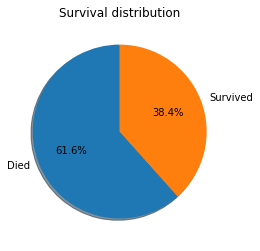

In [29]:
passangers = data['Survived'].value_counts(normalize=True).values
labels = ['Died', 'Survived']
fig1, ax1 = plt.subplots()
ax1.pie(passangers, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Survival distribution')
plt.show()

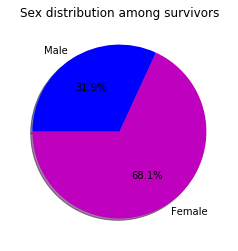

In [30]:
passangers = data.loc[data['Survived'] == 1, 'Sex'].value_counts(normalize=True).values
labels = ['Female', 'Male']
fig1, ax1 = plt.subplots()
ax1.pie(passangers, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, colors=['m', 'b'])
plt.title('Sex distribution among survivors')
plt.show()

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

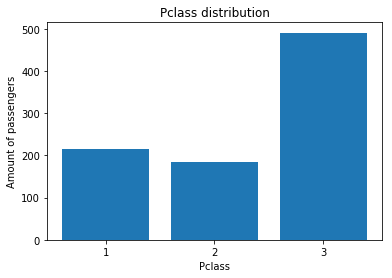

In [31]:
passangers = data['Pclass'].value_counts().values
labels = data['Pclass'].value_counts().index

plt.bar(labels, passangers)
plt.xticks(labels)
plt.xlabel('Pclass')
plt.ylabel('Amount of passengers')
plt.title('Pclass distribution')
 
plt.show()

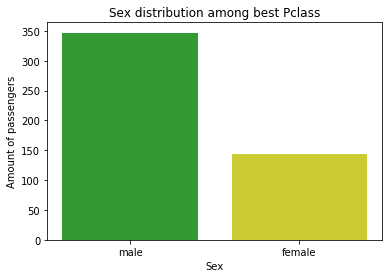

In [32]:
passangers = data.loc[data['Pclass'] == 3, 'Sex'].value_counts().values
labels = data.loc[data['Pclass'] == 3, 'Sex'].value_counts().index

plt.bar(labels, passangers, color=['g', 'y'], alpha=0.8)
plt.xticks(labels)
plt.xlabel('Sex')
plt.ylabel('Amount of passengers')
plt.title('Sex distribution among best Pclass')
 
plt.show()

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [33]:
max_fare = np.max(data['Fare'])
mean_fare = np.mean(data['Fare'])
min_fare = np.min(data['Fare'])
print('\tOverall\nMin fare: {}\nMean fare: {}\nMax fare: {}'.format(min_fare, mean_fare, max_fare))

	Overall
Min fare: 0.0
Mean fare: 32.2042079685746
Max fare: 512.3292


In [34]:
max_fare = np.max(data.loc[data['Embarked'] == 'S', 'Fare'])
mean_fare = np.mean(data.loc[data['Embarked'] == 'S', 'Fare'])
min_fare = np.min(data.loc[data['Embarked'] == 'S', 'Fare'])
print('\tFare in Southampton\nMin fare: {}\nMean fare: {}\nMax fare: {}'.format(min_fare, mean_fare, max_fare))

	Fare in Southampton
Min fare: 0.0
Mean fare: 27.07981180124218
Max fare: 263.0


In [35]:
fare_S = data.loc[data['Embarked'] == 'S', 'Fare']
fare_C = data.loc[data['Embarked'] == 'C', 'Fare']
fare_Q = data.loc[data['Embarked'] == 'Q', 'Fare']

Text(0, 0.5, 'Instances')

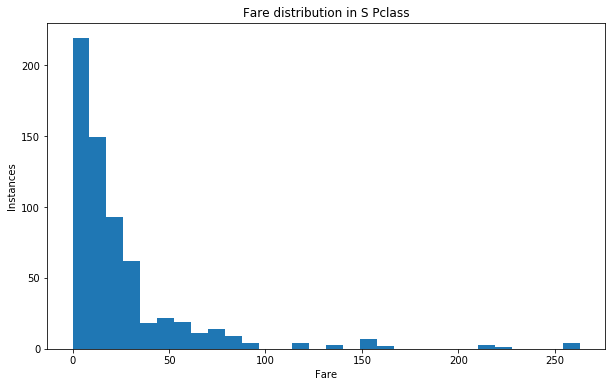

In [36]:
plt.figure(figsize=(10, 6))
plt.title('Fare distribution in S Pclass')
n, bins, patches = plt.hist(fare_S, bins=30)
plt.xlabel('Fare')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

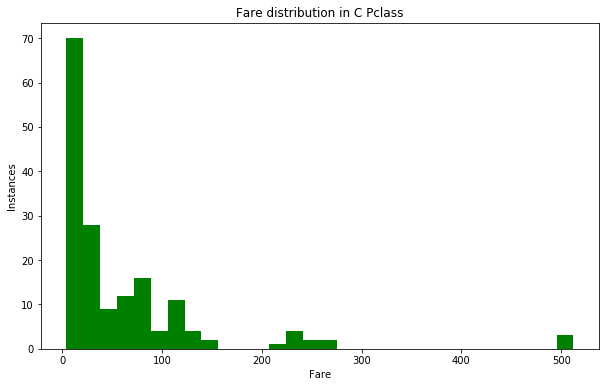

In [37]:
plt.figure(figsize=(10, 6))
plt.title('Fare distribution in C Pclass')
n, bins, patches = plt.hist(fare_C, bins=30, color='g')
plt.xlabel('Fare')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

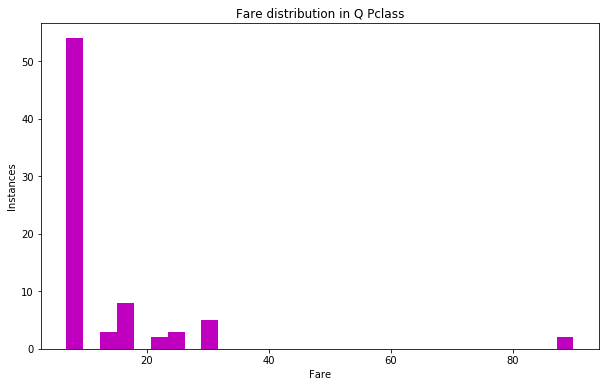

In [38]:
plt.figure(figsize=(10, 6))
plt.title('Fare distribution in Q Pclass')
n, bins, patches = plt.hist(fare_Q, bins=30, color='m')
plt.xlabel('Fare')
plt.ylabel('Instances')

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Признкаи Ticket и Cabin не имеют никакой информативности.
Ticket - имеет номера билетов разной длины, но мы не можем взять его как вещественный, ибо
к примеру билет 3333 и билет 33330 отличаются в 10 раз, но они на самом деле просто разные Id
билетов. Можно попытаться отсортировать билеты по первым буквам, но достаточно большое 
количество билетов имеют только номер.
Cabin - отсутствует бОльшая часть данных, можно заменить этот столбец на другой признак, суть
которого заключается в том, что он будет показывать пропущены данные или нет. Например,
0 - данные имеются, 1 - пропущены.

In [39]:
train = data.copy()
train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


В столбцах Age, Embarked
Age - 177, Embarked - 2

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [41]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [42]:
corr = train.corr()
corr['Fare']['Age']

0.09156609328505784

Text(0, 0.5, 'Fare')

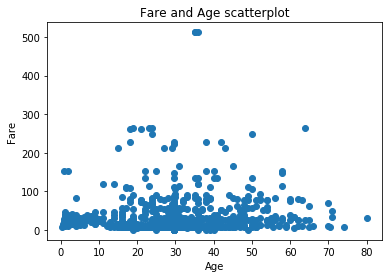

In [43]:
plt.scatter(train['Age'], train['Fare'])
plt.title('Fare and Age scatterplot')
plt.xlabel('Age')
plt.ylabel('Fare')

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [44]:
pclass_1_surv = train.loc[np.logical_and(train['Pclass'] == 1, train['Survived'] == 1)].shape[0]
pclass_1_died = train.loc[np.logical_and(train['Pclass'] == 1, train['Survived'] == 0)].shape[0]
pclass_2_surv = train.loc[np.logical_and(train['Pclass'] == 2, train['Survived'] == 1)].shape[0]
pclass_2_died = train.loc[np.logical_and(train['Pclass'] == 2, train['Survived'] == 0)].shape[0]
pclass_3_surv = train.loc[np.logical_and(train['Pclass'] == 3, train['Survived'] == 1)].shape[0]
pclass_3_died = train.loc[np.logical_and(train['Pclass'] == 3, train['Survived'] == 0)].shape[0]

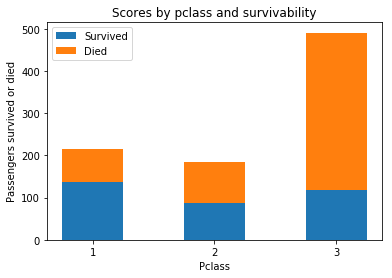

In [45]:
N = 3
pclass_survived = (pclass_1_surv, pclass_2_surv, pclass_3_surv)
pclass_died = (pclass_1_died, pclass_2_died, pclass_3_died)
ind = np.arange(N)
width = 0.5

p1 = plt.bar(ind, pclass_survived, width)
p2 = plt.bar(ind, pclass_died, width, bottom=pclass_survived)

plt.ylabel('Passengers survived or died')
plt.xlabel('Pclass')
plt.title('Scores by pclass and survivability')
plt.xticks(ind, ('1', '2', '3'))
plt.legend((p1[0], p2[0]), ('Survived', 'Died'))

plt.show()

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [46]:
train['Family'] = train['Parch'] + train['SibSp'] + 1
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,,,
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [47]:
train['Name'].value_counts()

Vander Planke, Mr. Leo Edmondus                      1
Young, Miss. Marie Grice                             1
Sage, Master. Thomas Henry                           1
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)       1
Saundercock, Mr. William Henry                       1
Andersson, Master. Sigvard Harald Elias              1
Williams-Lambert, Mr. Fletcher Fellows               1
Sharp, Mr. Percival James R                          1
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)      1
Stone, Mrs. George Nelson (Martha Evelyn)            1
Vestrom, Miss. Hulda Amanda Adolfina                 1
Matthews, Mr. William John                           1
Webber, Mr. James                                    1
Sjostedt, Mr. Ernst Adolf                            1
Meek, Mrs. Thomas (Annie Louise Rowley)              1
Goldenberg, Mrs. Samuel L (Edwiga Grabowska)         1
Montvila, Rev. Juozas                                1
Sage, Miss. Constance Gladys                         1
Asplund, M

Сделаю новый категориальный признак, который показывает титул пассажира
(https://www.kaggle.com/neeveermoree/titanic?scriptVersionId=9474094 - мой старый notebook
по титанику)

In [48]:
def name_column(df):
    titles = ['Mr.', 'Miss.', 'Mrs.', 'Master.']
    titles_ser = pd.Series([x.split()[1] for x in df.Name.values])
    df['Title'] = pd.Series(np.array([x if x in titles else 'other' for x in titles_ser.values]))
    return df

In [49]:
name_column(train)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
PassengerId,,,,,,,,,,,
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr.


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [50]:
families = pd.Series([x.split()[0] for x in train.Name.values])
families.value_counts().index[0]

'Andersson,'

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20614f4240>,
      dtype=object)

<Figure size 1080x576 with 0 Axes>

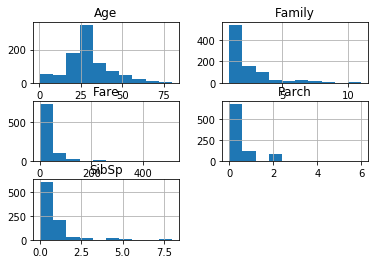

In [51]:
numeric_cols = ['Age', 'Fare', 'Family', 'SibSp', 'Parch']
plt.figure(figsize=(15, 8))
train.hist(column=numeric_cols)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std_scaler = StandardScaler()
train[numeric_cols] = std_scaler.fit_transform(train[numeric_cols])

/home/neeveermoree/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/neeveermoree/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
PassengerId,,,,,,,,,,,
0,0,3,"Braund, Mr. Owen Harris",male,-0.592481,0.432793,-0.473674,-0.502445,S,0.059160,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,0.432793,-0.473674,0.786845,C,0.059160,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,-0.284663,-0.474545,-0.473674,-0.488854,S,-0.560975,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,0.432793,-0.473674,0.420730,S,0.059160,Mrs.
4,0,3,"Allen, Mr. William Henry",male,0.407926,-0.474545,-0.473674,-0.486337,S,-0.560975,Mr.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f203cc57c50>,
      dtype=object)

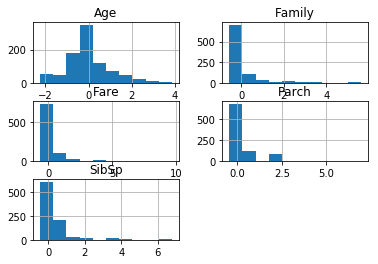

In [55]:
train.hist(numeric_cols)

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

Да, это признаки 'Pclass', 'Sex', 'Embarked' и мною добавленный 'Title'.

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
train.loc[train['Title'].isna(), 'Title'] = 'Mr.'

In [58]:
cat_cols = ['Pclass', 'Sex', 'Embarked', 'Title']
one_hot = OneHotEncoder(sparse=False)
new_cols = one_hot.fit_transform(train[cat_cols])

In [59]:
train.drop(cat_cols + ['Name'], axis=1, inplace=True)

In [60]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Family
PassengerId,,,,,,
0,0,-0.592481,0.432793,-0.473674,-0.502445,0.059160
1,1,0.638789,0.432793,-0.473674,0.786845,0.059160
2,1,-0.284663,-0.474545,-0.473674,-0.488854,-0.560975
3,1,0.407926,0.432793,-0.473674,0.420730,0.059160
4,0,0.407926,-0.474545,-0.473674,-0.486337,-0.560975


In [61]:
prepared_data = pd.concat([train, pd.DataFrame(new_cols)], axis=1, join='outer')

In [62]:
prepared_data.head()

,Survived,Age,SibSp,Parch,Fare,Family,0,1,2,3,4,5,6,7,8,9,10,11,12
PassengerId,,,,,,,,,,,,,,,,,,,
0,0,-0.592481,0.432793,-0.473674,-0.502445,0.059160,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0.638789,0.432793,-0.473674,0.786845,0.059160,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.284663,-0.474545,-0.473674,-0.488854,-0.560975,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,0.407926,0.432793,-0.473674,0.420730,0.059160,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0.407926,-0.474545,-0.473674,-0.486337,-0.560975,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
